### 1. Generating Hypothetical Population

Let's assume that this is our population data, including the indenpent variable, X and the dependent variable, Y. And the distribution of each looks like the following. 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
np.random.seed(0)
X = np.random.normal(0, 5, 10000)
epsilon = np.random.normal(0, 1, 10000)

beta_0 = 100
beta_1 = 0.3

Y = beta_0 + beta_1*X + epsilon

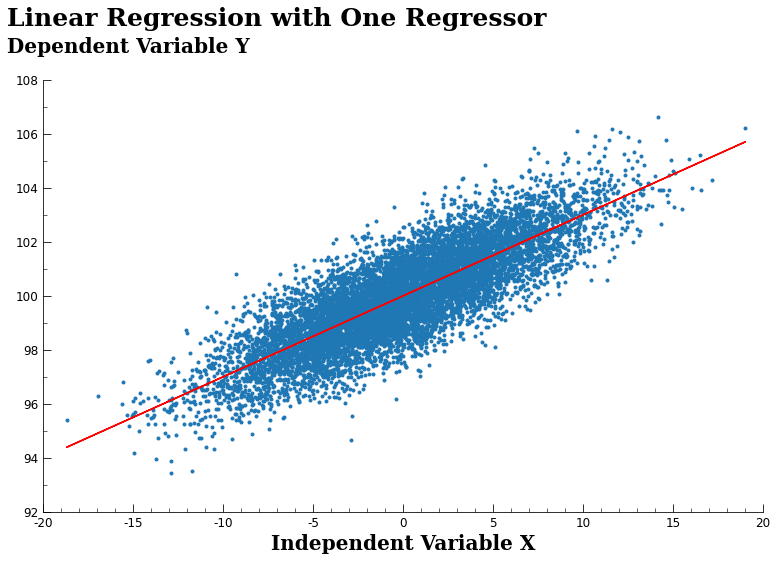

In [88]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.scatter(X, Y, marker=".")
ax.plot(X, beta_0 + beta_1*X, color="red")

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.tick_params(axis='x', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='x', which="minor", direction='in', length=4, labelsize=12)

ax.tick_params(axis='y', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='y', which="minor", direction='in', length=4, labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim(92, 108)
ax.set_xlim(-20, 20)

ax.set_xlabel("Independent Variable X", fontfamily='serif', fontsize=20, fontweight="bold")
ax.text(-22,109,'Dependent Variable Y', fontfamily='serif', fontsize=20, ma='center', fontweight='bold')
ax.text(-22,110,'Linear Regression with One Regressor', fontfamily='serif', fontsize=25, ma='center', fontweight='bold')

plt.show()

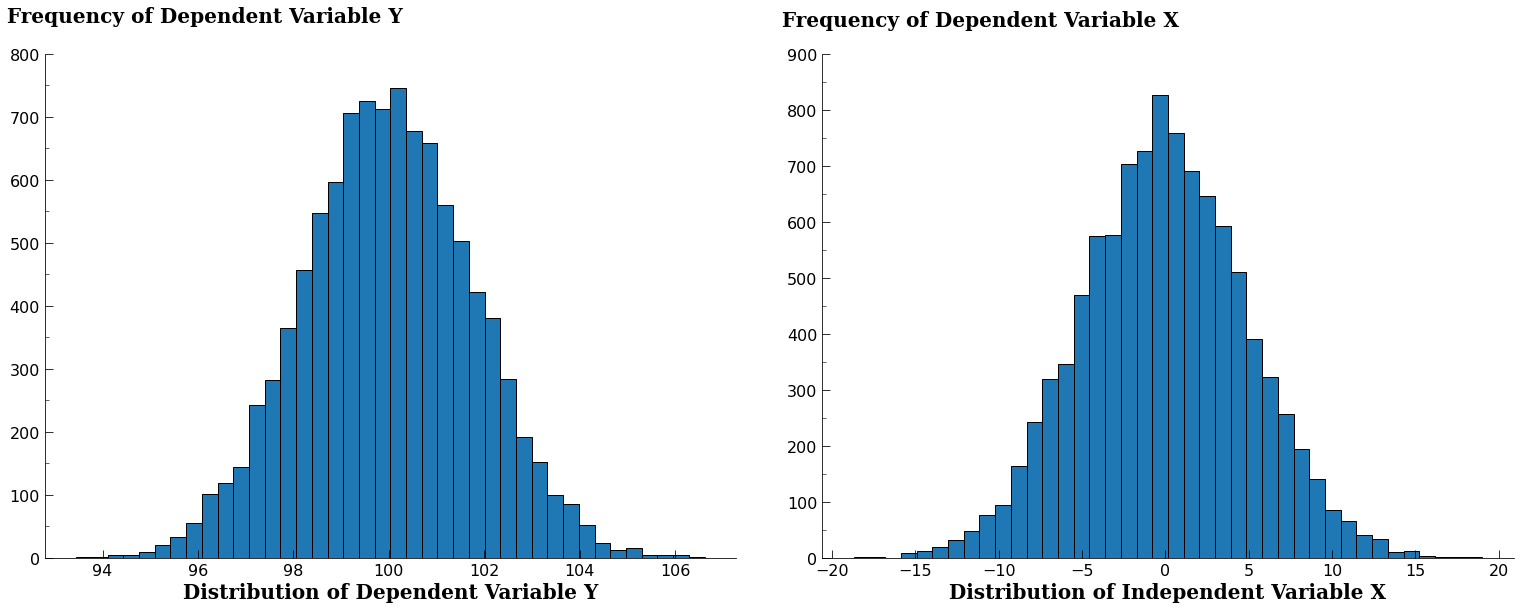

In [77]:
fig = plt.figure(figsize=(12,7))
ax2 = fig.add_axes([0, 1, 0.8, 1])
ax3 = fig.add_axes([0.9, 1, 0.8, 1])

ax2.hist(Y, bins=40, ec="black")
ax3.hist(X, bins=40, ec="black")

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

ax2.yaxis.set_major_locator(MultipleLocator(100))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax2.yaxis.set_minor_locator(MultipleLocator(50))

ax3.yaxis.set_major_locator(MultipleLocator(100))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax3.yaxis.set_minor_locator(MultipleLocator(50))

ax2.tick_params(axis='y', which="major", direction='in', pad=5, length=8, labelsize=16)
ax2.tick_params(axis='y', which="minor", direction='in', length=4, labelsize=12)
ax2.tick_params(axis='x', which="major", direction='in', pad=5, length=8, labelsize=16)

ax3.tick_params(axis='y', which="major", direction='in', pad=5, length=8, labelsize=16)
ax3.tick_params(axis='y', which="minor", direction='in', length=4, labelsize=12)
ax3.tick_params(axis='x', which="major", direction='in', pad=5, length=8, labelsize=16)

ax2.set_ylim(0, 800)
ax3.set_ylim(0, 900)

ax2.set_xlabel("Distribution of Dependent Variable Y", fontfamily='serif', fontsize=20, fontweight="bold")
ax3.set_xlabel("Distribution of Independent Variable X", fontfamily='serif', fontsize=20, fontweight="bold")

ax2.text(92,850,'Frequency of Dependent Variable Y', fontfamily='serif', fontsize=20, ma='center', fontweight='bold')
ax3.text(-23,950,'Frequency of Dependent Variable X', fontfamily='serif', fontsize=20, ma='center', fontweight='bold')

plt.show()

### 2. Taking a Sample from the Population

Let's take a sample with size of 100 from this population. 

In [91]:
xy_observation = np.array([X.tolist(), Y.tolist()])
xy_observation = xy_observation.transpose()
print("The first column is X and the second column is Y.")
print()
print(xy_observation)

The first column is X and the second column is Y.

[[  8.82026173 102.44396149]
 [  2.00078604  99.76700481]
 [  4.89368992 103.20170722]
 ...
 [  2.58436089 100.71804902]
 [ -0.16460347  98.8916877 ]
 [  6.49055716 101.62063871]]


In [94]:
inx = np.random.randint(10000, size=100)
sample = xy_observation[inx]
sample = sm.add_constant(sample)
print("Now the first column is the constant term, the second is X and the third is Y.")
print()
print(sample[0:6,:])

Now the first column is the constant term, the second is X and the third is Y.

[[  1.           0.69666771 100.89537007]
 [  1.          -7.68718805  98.89656524]
 [  1.          -3.80137752  99.97820076]
 [  1.           0.85578448  99.16899262]
 [  1.          -4.43452163  99.38185252]
 [  1.          -2.23321747  99.01694206]]


In [97]:
sample_x = sample[:,0:2]
sample_y = sample[:,2]
    
sample_results = sm.OLS(sample_y, sample_x).fit()
print(sample_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     184.2
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           3.08e-24
Time:                        23:58:45   Log-Likelihood:                -130.19
No. Observations:                 100   AIC:                             264.4
Df Residuals:                      98   BIC:                             269.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9601      0.090   1105.326      0.0